# Week 2 Seminar

Top-pop recommender, metrics

In [1]:
import json
import random
import copy
from collections import namedtuple

import pandas as pd
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_json("/Users/darya.nikanorova/recsys_course/log/random_10k/data.json", lines=True)
data["rnd"] = np.random.random(len(data))

data.head()

,message,timestamp,user,track,time,latency,recommendation,experiments,rnd
0,next,2022-05-29 10:47:58.610,1984,1228,1.00,0.000977,39145.0,{'AA': 'T1'},0.552989
1,next,2022-05-29 10:47:58.619,1984,39145,0.00,0.000600,11308.0,{'AA': 'T1'},0.473802
2,next,2022-05-29 10:47:58.627,1984,11308,0.01,0.000765,28757.0,{'AA': 'T1'},0.006427
3,next,2022-05-29 10:47:58.635,1984,28757,0.00,0.000707,40694.0,{'AA': 'T1'},0.275458
4,next,2022-05-29 10:47:58.643,1984,40694,0.02,0.000620,10894.0,{'AA': 'T1'},0.095716


## Compute track popularity

In [3]:
track_popularity = (
    data[data["rnd"] > 0.5]
    .groupby("track")["time"]
    .sum()
    .to_frame()
    .sort_values("time", ascending=False)
    .reset_index()
)

track_popularity.head()

,track,time
0,159,15.00
1,2254,14.98
2,170,13.83
3,4186,12.82
4,156,12.00


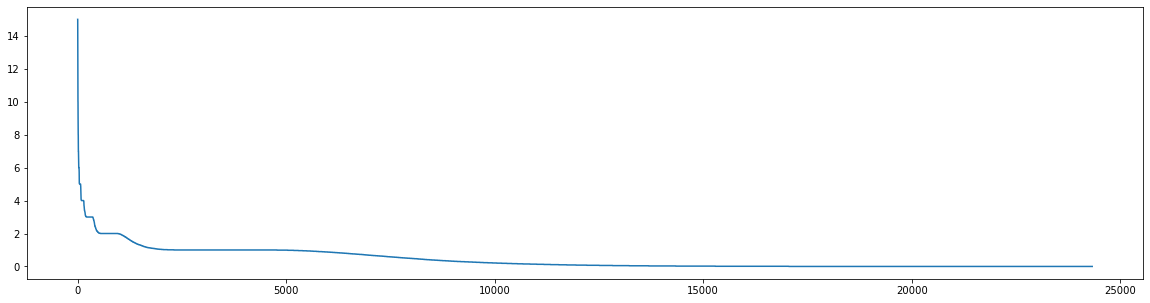

In [4]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(track_popularity.index.values, track_popularity["time"].values)

## Compute offline metrics

In [5]:
tracks = track_popularity["track"].tolist()
metrics = (
    data[(data["rnd"] <= 0.5) & (data["time"] >= 0.75)]
    .copy()
    .reset_index()
    .sort_values('time', ascending=False)
    .drop_duplicates(subset=['user', 'track'])
)

In [22]:
def precision_at(recommendations, track, k):
    random.shuffle(recommendations)
    return 1.0 / k * int(track in recommendations[:k])


# TODO 1: Implement MRR here:


# TODO 3: Implement Recall@k here:

### 1. Precision@k

In [23]:
sh_10_p_10_udf = lambda track: precision_at(tracks[:10], track, 10)
sh_100_p_10_udf = lambda track: precision_at(tracks[:100], track, 10)
sh_1000_p_10_udf = lambda track: precision_at(tracks[:1000], track, 10)

In [24]:
metrics["sh_10_p_10"] = metrics["track"].map(sh_10_p_10_udf)
metrics["sh_100_p_10"] = metrics["track"].map(sh_100_p_10_udf)
metrics["sh_1000_p_10"] = metrics["track"].map(sh_1000_p_10_udf)

In [25]:
metrics.groupby("user")[["sh_10_p_10", "sh_100_p_10", "sh_1000_p_10"]].sum().describe()

,sh_10_p_10,sh_100_p_10,sh_1000_p_10
count,4557.000000,4557.000000,4557.000000
mean,0.001580,0.000878,0.000132
std,0.012819,0.009329,0.003627
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.200000,0.100000,0.100000


### 2. MRR

In [26]:
# TODO 2: Apply MRR here:

### 3. Recall@k

In [28]:
# TODO 4: Apply Recall here:

## Export data for prod

In [30]:
with open("/Users/darya.nikanorova/recsys_course/import/top_tracks.json", "w") as top_tracks_file:
    json.dump(track_popularity["track"].tolist(), top_tracks_file)